In [93]:
import yfinance as yf
import pandas as pd
import numpy as np

In [94]:
# We selected 100 cryptocurrencies
cryptos = [
    'BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'SOL-USD', 'DOT-USD', 'LINK-USD', 'UNI-USD', 'LTC-USD', 'MANA-USD',
    'XRP-USD', 'DOGE-USD', 'BCH-USD', 'EOS-USD', 'XLM-USD', 'ATOM-USD', 'VET-USD', 'TRX-USD', 'XTZ-USD', 'THETA-USD',
    'AVAX-USD', 'FTM-USD', 'NEAR-USD', 'MATIC-USD', 'ALGO-USD', 'CRO-USD', 'FIL-USD', 'HBAR-USD', 'QNT-USD', 'ICP-USD',
    'AAVE-USD', 'GRT-USD', 'SUSHI-USD', 'YFI-USD', 'SNX-USD', 'RUNE-USD', '1INCH-USD', 'CRV-USD', 'BAL-USD',
    'KSM-USD', 'ZRX-USD', 'BAT-USD', 'ENJ-USD', 'ANKR-USD', 'CHZ-USD', 'STORJ-USD', 'DGB-USD', 'ZIL-USD', 'SC-USD',
    'ICX-USD', 'ONT-USD', 'QTUM-USD', 'OMG-USD', 'BNT-USD', 'KAVA-USD', 'LRC-USD', 'ZEN-USD', 'SKL-USD', 'OCEAN-USD',
    'REEF-USD', 'SRM-USD', 'AKT-USD', 'MLN-USD', 'STMX-USD', 'XEM-USD', 'FTT-USD', 'GALA-USD', 'HNT-USD', 'MKR-USD',
    'DAI-USD', 'BUSD-USD', 'USDT-USD', 'TUSD-USD', 'USDC-USD', 'UST-USD', 'LUNA-USD', 'AUDIO-USD', 'GNO-USD',
    'UMA-USD', 'POLS-USD', 'ORN-USD', 'DNT-USD', 'RLC-USD', 'SXP-USD', 'STPT-USD', 'WAVES-USD', 'CVC-USD', 'BLZ-USD',
    'MFT-USD', 'FUN-USD', 'RDN-USD', 'DOCK-USD', 'DATA-USD', 'PERP-USD', 'FORTH-USD', 'IDEX-USD', 'CEL-USD', 'QKC-USD'
]

In [95]:
# Download historical data of the selected cryptocurrencies (closing price at each day)
data = yf.download(cryptos, start='2020-06-01', end='2023-01-01', interval='1d')['Adj Close']

[*********************100%%**********************]  98 of 98 completed


In [96]:
# We decided to select data post Covid, to avoid extreme volatility

returns = data.pct_change().dropna() # Find returns and eliminate Nan values
returns
#print(returns.head(10))

Ticker,1INCH-USD,AAVE-USD,ADA-USD,AKT-USD,ALGO-USD,ANKR-USD,ATOM-USD,AUDIO-USD,AVAX-USD,BAL-USD,...,VET-USD,WAVES-USD,XEM-USD,XLM-USD,XRP-USD,XTZ-USD,YFI-USD,ZEN-USD,ZIL-USD,ZRX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-11,0.053202,0.055708,0.072585,-0.014009,0.076538,0.104563,0.061954,0.032513,0.061187,0.143113,...,0.049432,0.078886,0.075672,0.106761,0.063841,0.149408,0.329690,0.128146,0.058060,0.071992
2021-05-12,-0.156312,0.073059,-0.119780,-0.042810,-0.152650,-0.155770,-0.157131,-0.161528,-0.130579,-0.140813,...,-0.226780,-0.067675,-0.189463,-0.193550,-0.155526,-0.172665,-0.209039,-0.101514,-0.185595,-0.126447
2021-05-13,0.014179,0.036781,0.245298,-0.020166,0.081303,0.014253,0.038354,0.005628,0.092578,-0.014580,...,0.106398,0.025784,0.061526,0.094183,0.088989,0.043544,0.011155,0.040881,0.037861,-0.008026
2021-05-14,0.028351,0.168954,0.036784,-0.008309,0.085737,0.061670,0.094286,0.105562,0.056345,0.059552,...,0.025644,0.045697,0.034213,0.037089,0.032384,0.056701,0.174097,0.078779,0.081647,0.057740
2021-05-15,-0.084258,-0.131842,0.084413,0.050582,-0.057824,-0.069226,-0.046124,-0.099066,-0.068757,-0.107967,...,-0.078425,-0.062522,-0.070337,0.012273,0.059136,-0.106597,-0.139921,-0.136926,-0.074552,-0.093851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.013981,0.025603,-0.018572,0.002226,-0.008910,-0.029111,0.003633,0.007024,-0.006607,-0.012364,...,-0.011802,-0.014734,-0.008238,-0.014031,0.006571,-0.029613,-0.003911,-0.023682,-0.025895,-0.022536
2022-12-28,-0.039062,-0.063143,-0.046058,-0.053765,-0.016085,-0.074444,-0.010139,-0.016846,-0.038079,-0.052532,...,-0.023637,-0.089700,-0.031887,-0.031806,-0.031497,-0.045152,-0.050212,-0.030893,-0.050259,-0.041292
2022-12-29,-0.005664,0.014763,-0.017063,0.013328,-0.012497,-0.014987,0.024713,0.000054,-0.018765,0.011528,...,0.006533,-0.041783,0.000567,0.003525,-0.038384,-0.016526,-0.011195,0.008035,-0.019844,-0.001515


<Axes: xlabel='Ticker', ylabel='Ticker'>

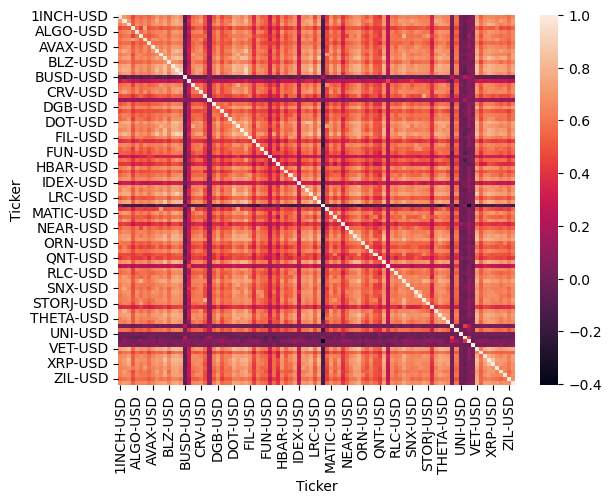

In [97]:
# Compute the corelation matrix and heatmap
import seaborn as sns
corr_df = returns.corr()
sns.heatmap(corr_df)

In [98]:
# Download data for SHY (iShares 1-3 Year Treasury Bond ETF) 
# We used it as a proxy for the risk free rate
shy = yf.download('SHY', start='2020-06-01', end='2023-01-01', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [99]:
# we used the colosing date yield as the risk free rate
shy_close = shy['Close']
shy_returns = shy_close.pct_change().dropna()
shy_returns

Date
2020-06-02    0.000000
2020-06-03   -0.000808
2020-06-04    0.000231
2020-06-05   -0.000347
2020-06-08   -0.000231
                ...   
2022-12-23   -0.000492
2022-12-27   -0.001353
2022-12-28    0.000000
2022-12-29    0.000739
2022-12-30   -0.001230
Name: Close, Length: 652, dtype: float64

## DATAFRAME

In [100]:
# Define a function for the Sharpe Ratio, in order to find the SR of the 100 Cryptocurrencies and select the ones with higher SR
def calculate_sharpe_ratios(df, risk_free_rate_df):
   
    # Create an empty dictionary to store the Sharpe ratios
    sharpe_ratios = {}
    
    # Iterate over each asset column in the DataFrame
    for column in df.columns:
        # Extract the returns for the current asset
        asset_returns = df[column]
        
        # Match the dates in risk_free_rate_df with the dates in asset_returns
        risk_free_rate = risk_free_rate_df.reindex(asset_returns.index).ffill().bfill()
        
        # Calculate the excess returns by subtracting the risk-free rate
        excess_returns = asset_returns - risk_free_rate
        
        # Calculate the mean excess return
        mean_excess_return = excess_returns.mean()
        
        # Calculate the standard deviation of the excess returns
        std_dev = excess_returns.std()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = mean_excess_return / std_dev
        
        # Store the Sharpe ratio in the dictionary
        sharpe_ratios[column] = sharpe_ratio
    
    # Create a DataFrame from the dictionary
    sharpe_ratios_df = pd.DataFrame(list(sharpe_ratios.items()), columns=['Asset', 'Sharpe Ratio'])
    
    return sharpe_ratios_df


In [101]:
# Calculate the sharpe ratio for all cryptocurrencies
SP = calculate_sharpe_ratios(returns, shy_returns) 
SP

,Asset,Sharpe Ratio
0,1INCH-USD,-0.042929
1,AAVE-USD,-0.017243
2,ADA-USD,-0.029642
3,AKT-USD,-0.059416
4,ALGO-USD,-0.022793
...,...,...
93,XTZ-USD,-0.022597
94,YFI-USD,-0.028487
95,ZEN-USD,-0.028739
96,ZIL-USD,-0.015613


In [102]:
# Function to select the top N assets with the highest Sharpe Ratio
def select_top_n_sharpe_ratios(sharpe_ratios_df, n=10):
    
    # Sort the DataFrame by Sharpe Ratio in descending order and select the top N
    top_n_sharpe_ratios_df = sharpe_ratios_df.sort_values(by='Sharpe Ratio', ascending=False).head(n)
    
    return top_n_sharpe_ratios_df


In [103]:
# Select the top N Crypto with the highest Sharpe Ratio
asset= select_top_n_sharpe_ratios(SP, n=10)

# Extract the Cryptocurrency names
asset_names = asset['Asset'].to_numpy()

# Select the returns for the selected Crypto
selected_df = returns[asset_names]

# ASSET DISTRIBUTION

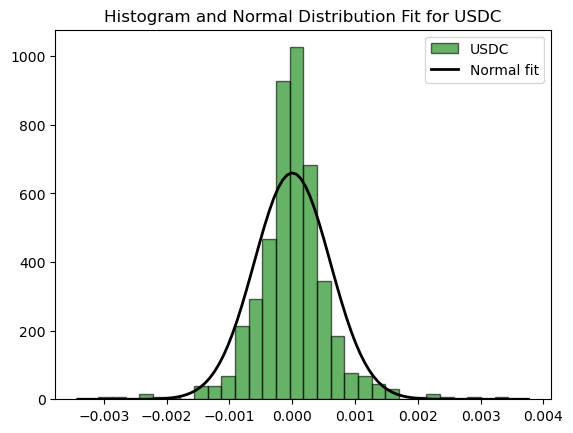

In [104]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import norm

# We select one of the crypto just as example
USDC = selected_df.iloc[:, 2].to_numpy()

# By adding the normal distribution we see if it fits the data
mu, std = norm.fit(USDC)

# We plot the Crypto and the normal distribution
plt.hist(USDC, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='USDC')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal fit')
plt.legend()
plt.title('Histogram and Normal Distribution Fit for USDC')
plt.show()

In [105]:
# The Guassian does not fit the data well, so we decide to find the empitical distribution

kde = gaussian_kde(USDC)
x = np.linspace(min(USDC), max(USDC), 1000)
y = kde(x)

Text(0.5, 1.0, 'Histogram and KDE for USDC')

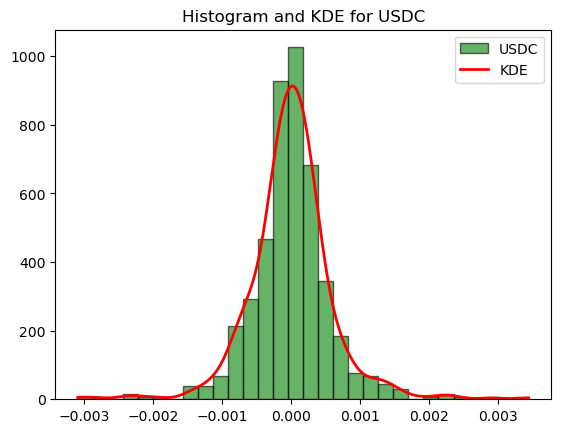

In [106]:
# We plot the histogram 
plt.hist(USDC, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='USDC')

# We plot the KDE as the empirical distribution
plt.plot(x, y, 'r', linewidth=2, label='KDE')
plt.legend()
plt.title('Histogram and KDE for USDC')


##### The empirical distribution fits the data in an appropriate way
##### Therefore in order to find a sample we are going to extract an empirical distrution for each of the 10 assets 
## EMPIRICAL DISTRIBUTIONS and RANDOM SAMPLE

In [107]:
# Apply MC siulation throght Acceptance Rejection Method
# Function to generate samples from the KDE

def rejection_sampling(kde, min_val, max_val, num_samples=1000):
    samples = []
    max_density = np.max(kde(x))  # Determine the maximum value of the target distribution
    while len(samples) < num_samples:
        u = np.random.uniform(min_val, max_val)  # Sample from the proposal distribution
        v = np.random.uniform(0, max_density)  # Sample from the uniform distribution scaled by max_density
        if v < kde(u):  # Accept or reject the sample
            samples.append(u)
    return samples

In [108]:
# We create a dataset with the same dimension of the inital dataframe
simulated_df = pd.DataFrame()

In [109]:
# We create a dataframe of the same dimention of selected_df in which we includes the same Crypto, but for each date we substitute
# real data with simulated data

for col in selected_df.columns:
    prova = selected_df[col]
    kde = gaussian_kde(prova)
    x = np.linspace(min(prova), max(prova), 1000)
    y = kde(x)
    sampled_values = rejection_sampling(kde, min(prova), max(prova), num_samples=1000)
    simulated_df[col] = sampled_values
print(selected_df.head())

Ticker      USDT-USD  USDC-USD  TUSD-USD  BUSD-USD   DAI-USD   QNT-USD  \
Date                                                                     
2021-05-11 -0.000170  0.000150 -0.000360  0.000054  0.000281  0.059456   
2021-05-12  0.000026 -0.000070  0.001063  0.000100 -0.000761 -0.039826   
2021-05-13 -0.000125 -0.000273  0.000099  0.000145  0.000848  0.360555   
2021-05-14  0.000097  0.000138 -0.001419 -0.000141 -0.000800 -0.038676   
2021-05-15 -0.000142  0.000128  0.000819  0.000072 -0.000600 -0.084365   

Ticker      GALA-USD  LUNA-USD   UNI-USD  MATIC-USD  
Date                                                 
2021-05-11 -0.027352  0.015883 -0.392913   0.221869  
2021-05-12 -0.118838 -0.119901  0.259403  -0.046956  
2021-05-13  0.025681  0.195539 -0.159629   0.033503  
2021-05-14  0.019474 -0.108479  0.050245   0.396531  
2021-05-15  0.006320 -0.003133 -0.351225   0.093437  


## PORTFOLIO OPTIMIZATION

In [110]:
# Find then Mean Variance Weights for both the samples in order to compare the weights
import scipy.optimize as spopt

# Define the function that find the annual return of portfolio
def port_ret(x, mu, annual):
    'x: weights of the portfolio'
    'mu: returns of the assets'
    return np.dot(x, mu) * annual

# Define the function that find the variance of portfolio
def port_variance(x, r, annual):
    'x: weights of the portfolio'
    'r: returns of the assets'
    S = r.cov()
    return np.dot(np.dot(x, S), x) * annual

# Define the function that find the annual volatility of portfolio
def port_vola(x, r, annual):
    'x: weights of the portfolio'
    'r: returns of the assets'
    return np.sqrt(port_variance(x, r, annual))

# Define the function that find the expected portfolio return
def port_ret_eq(x, mu, annual, mu_0):
    'x: weights of the portfolio'
    'mu: returns of the assets'
    'mu_0: target return'
    return np.dot(x, mu) * annual - mu_0

### Optimization of real data

In [111]:
# Real data
annual = 252
x0 = pd.Series(1/selected_df.shape[1], index=selected_df.columns)
mu = selected_df.mean()
r = selected_df.copy()

expected_return = port_ret(x0, mu, annual)
initial_variance = port_variance(x0, r, annual)
initial_volatility = port_vola(x0, r, annual)

mu_0 = 0.09  # rendimento target annuale
cons_MV = ({'type': 'eq', 'fun': lambda x: sum(x) - 1},
           {'type': 'eq', 'fun': port_ret_eq, 'args': (mu, annual, mu_0)})

res = spopt.minimize(port_variance, x0, method='SLSQP', args=(r, annual), 
                     constraints=cons_MV, options={'disp': True})

print("Optimization Result:", res)
print("Optimized Portfolio Weights:", res.x)
print("Optimized Portfolio Return:", port_ret(res.x, mu, annual))
print("Optimized Portfolio Variance:", port_variance(res.x, r, annual))
print("Optimized Portfolio Volatility:", port_vola(res.x, r, annual))

weights=res.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.003751311922088407
            Iterations: 17
            Function evaluations: 193
            Gradient evaluations: 17
Optimization Result:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.003751311922088407
       x: [ 9.614e-01  2.579e-01  8.676e-02 -6.383e-02 -2.877e-01
            2.643e-02  1.475e-02  2.693e-04  2.458e-06  4.016e-03]
     nit: 17
     jac: [-4.375e-05  8.101e-05  1.271e-04  1.183e-04  8.665e-05
            8.264e-02  1.196e-01  7.536e+00  5.536e+02  5.247e-02]
    nfev: 193
    njev: 17
Optimized Portfolio Weights: [ 9.61375766e-01  2.57882356e-01  8.67619749e-02 -6.38339365e-02
 -2.87651938e-01  2.64287096e-02  1.47489841e-02  2.69329788e-04
  2.45796666e-06  4.01629563e-03]
Optimized Portfolio Return: 0.08999999994842244
Optimized Portfolio Variance: 0.003751311922088407
Optimized Portfolio Volatility: 0.06124795443186986


### Optimization of simulated data

In [112]:
# Simulated data
x0 = pd.Series(1/simulated_df.shape[1], index=simulated_df.columns)
mu = simulated_df.mean()
r = simulated_df.copy()

expected_return = port_ret(x0, mu, annual)
initial_variance = port_variance(x0, r, annual)
initial_volatility = port_vola(x0, r, annual)

mu_0 = 0.09  
cons_MV = ({'type': 'eq', 'fun': lambda x: sum(x) - 1},
           {'type': 'eq', 'fun': port_ret_eq, 'args': (mu, annual, mu_0)})

res = spopt.minimize(port_variance, x0, method='SLSQP', args=(r, annual), 
                     constraints=cons_MV, options={'disp': True})

print("Optimization Result:", res)
print("Optimized Portfolio Weights:", res.x)
print("Optimized Portfolio Return:", port_ret(res.x, mu, annual))
print("Optimized Portfolio Variance:", port_variance(res.x, r, annual))
print("Optimized Portfolio Volatility:", port_vola(res.x, r, annual))

weights2=res.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.000225475172542431
            Iterations: 7
            Function evaluations: 85
            Gradient evaluations: 7
Optimization Result:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.000225475172542431
       x: [ 2.094e-01  1.905e-01  2.215e-01  2.063e-01  1.701e-01
            9.703e-04  4.280e-05  8.373e-05  1.308e-06  1.097e-03]
     nit: 7
     jac: [ 2.300e-05  1.500e-05  4.020e-05  7.247e-05  1.513e-04
            4.581e-03  6.994e-04  1.945e+00  1.716e+02  2.745e-03]
    nfev: 85
    njev: 7
Optimized Portfolio Weights: [2.09447096e-01 1.90510590e-01 2.21507330e-01 2.06263051e-01
 1.70077138e-01 9.70314683e-04 4.27956364e-05 8.37320821e-05
 1.30845728e-06 1.09664500e-03]
Optimized Portfolio Return: 0.0900000000038088
Optimized Portfolio Variance: 0.000225475172542431
Optimized Portfolio Volatility: 0.015015830731012886


In [113]:
#let's put together the weights
weights = pd.Series(weights)
weights.name = 'Real data'
weights2 = pd.Series(weights2)
weights2.name = 'Simulated'

w = pd.concat([weights, weights2], axis=1)

column_sums = w.sum(axis=0) #the two portfolio weights sum to 1
print(w)

   Real data  Simulated
0   0.961376   0.209447
1   0.257882   0.190511
2   0.086762   0.221507
3  -0.063834   0.206263
4  -0.287652   0.170077
5   0.026429   0.000970
6   0.014749   0.000043
7   0.000269   0.000084
8   0.000002   0.000001
9   0.004016   0.001097


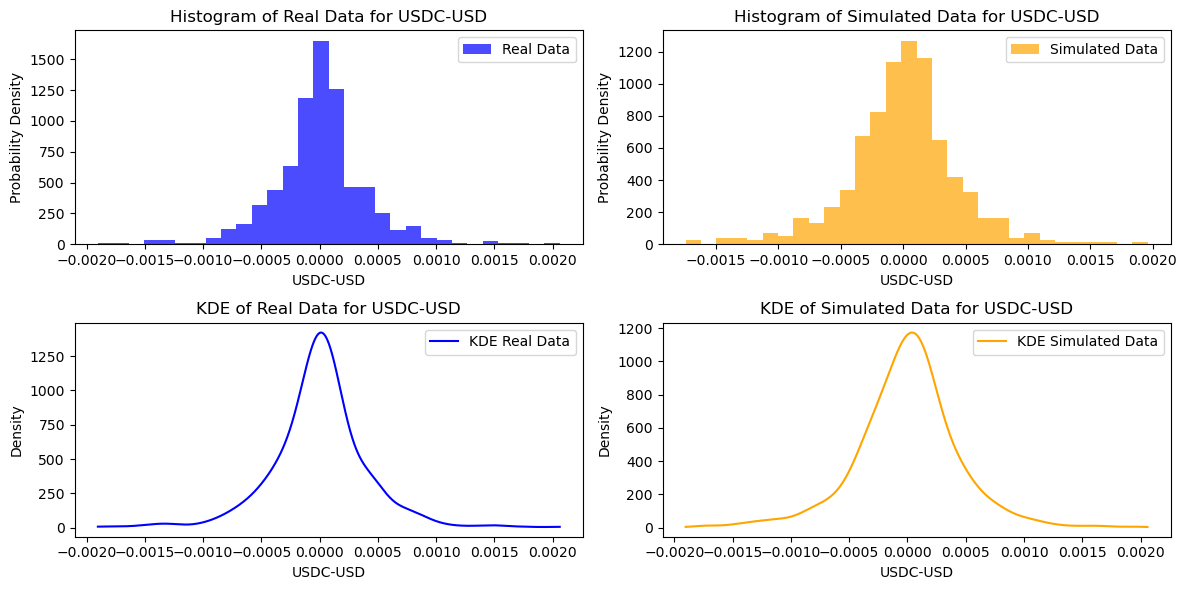

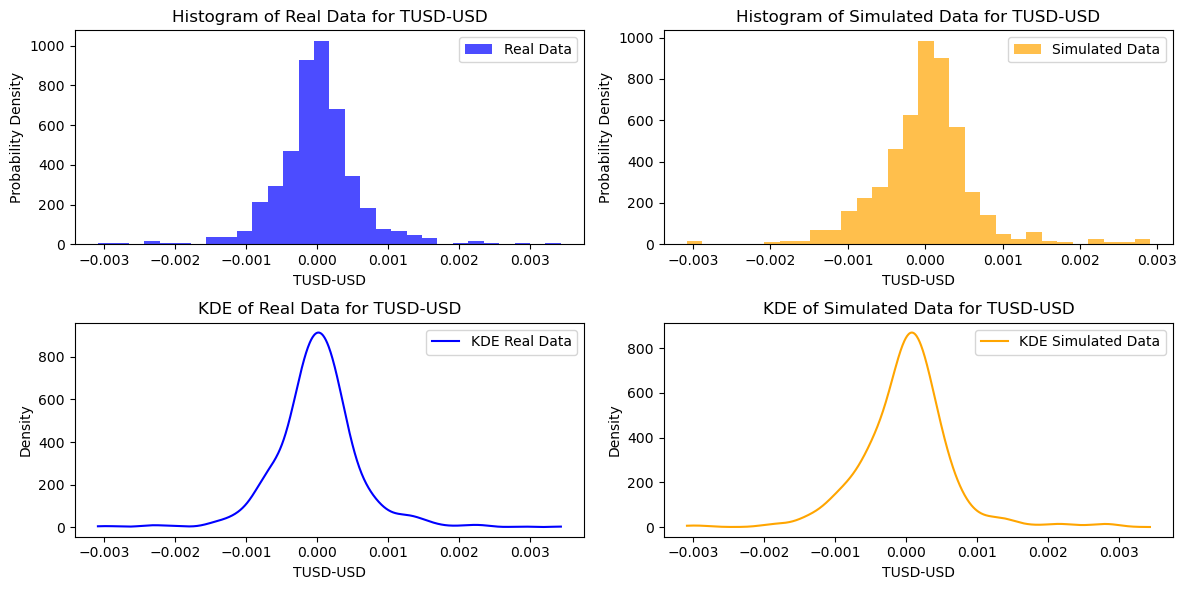

In [114]:
#check the result of MC simulation for just two columns of the dataframe
import matplotlib.pyplot as plt
selected_df = selected_df.iloc[:, 1:3]

simulated_df = pd.DataFrame()

for col in selected_df.columns:
    prova = selected_df[col]
    kde = gaussian_kde(prova)
    x = np.linspace(min(prova), max(prova), 1000)
    y = kde(x)
    
    sampled_values = rejection_sampling(kde, min(prova), max(prova), num_samples=10000)
    simulated_df[col] = sampled_values[:len(prova)]

    # Plot histograms
    plt.figure(figsize=(12, 6))

    # Histogram for real data
    plt.subplot(2, 2, 1)
    plt.hist(prova, bins=30, alpha=0.7, color='blue', label='Real Data', density=True)
    plt.title(f'Histogram of Real Data for {col}')
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.legend()

    # Histogram for simulated data
    plt.subplot(2, 2, 2)
    plt.hist(simulated_df[col], bins=30, alpha=0.7, color='orange', label='Simulated Data', density=True)
    plt.title(f'Histogram of Simulated Data for {col}')
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.legend()
    
    # KDE plot for real data
    plt.subplot(2, 2, 3)
    plt.plot(x, y, color='blue', label='KDE Real Data')
    plt.title(f'KDE of Real Data for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    
    # KDE plot for simulated data
    kde_simulated = gaussian_kde(simulated_df[col])
    y_simulated = kde_simulated(x)
    plt.subplot(2, 2, 4)
    plt.plot(x, y_simulated, color='orange', label='KDE Simulated Data')
    plt.title(f'KDE of Simulated Data for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
